# Preliminaries

In [59]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as signal

import dsp_utils

%matplotlib inline

detector_name = 'Thrush'
fs = 22050.

# Read old filter from file.

In [60]:
file_name = 'Old Bird {} Detector Filter.txt'.format(detector_name)
with open(file_name, 'r') as file_:
    text = file_.read()
lines = text.strip().split()
h_old = [float(line) for line in lines]

# Design new filter.

In [61]:
fs2 = fs / 2
bw = 100
filter_length = 100

if detector_name == 'Thrush':
    f0 = 2800
    f1 = 5000
else:
    f0 = 6000
    f1 = 10000

bands = np.array([0, f0 - bw, f0, f1, f1 + bw, fs2]) / fs2
desired = np.array([0, 0, 1, 1, 0, 0])
h_new = dsp_utils.firls(filter_length, bands, desired)

# Show filter coefficients side-by-side.

In [62]:
for i in range(filter_length):
    print(h_old[i], h_new[i], h_new[i] - h_old[i])

-0.00015541833999809489 -0.000155418339998 -1.94017978766e-16
0.0016569325010559808 0.00165693250106 -7.43762690325e-17
-0.001410986072518228 -0.00141098607252 -4.77048955894e-18
0.0008585138370693752 0.000858513837069 -1.5287250632e-17
0.00824495355927836 0.00824495355928 -1.56125112838e-16
0.0076551528204952864 0.00765515282049 -8.61290205822e-16
-0.004352042598628135 -0.00435204259863 1.22298005056e-16
-0.01264479270525732 -0.0126447927053 1.54216917014e-15
-0.006144053182573345 -0.00614405318257 1.30104260698e-17
0.004609113832348361 0.00460911383235 -9.94863913473e-16
0.005121667301890593 0.00512166730189 3.20923843056e-17
0.00021461956061122111 0.000214619560612 5.22368606704e-16
0.0029034421724369627 0.00290344217244 1.35742111995e-16
0.008735622851581595 0.00873562285158 -1.17440779324e-15
0.0023731590718807033 0.00237315907188 -3.18755438711e-16
-0.012906231335730364 -0.0129062313357 1.16746889933e-15
-0.015548663753736067 -0.0155486637537 -2.94902990916e-17
0.0001921979747983

# Plot frequency responses.

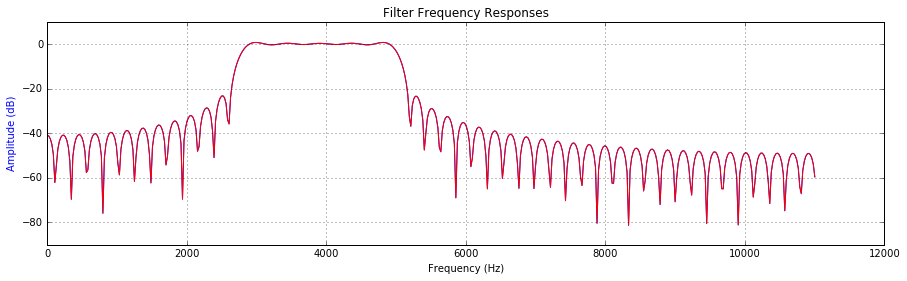

In [63]:
# Get frequency response.
w, H_old = signal.freqz(h_old)
_, H_new = signal.freqz(h_new)
w *= fs / (2 * np.pi)


# Plot frequency response.

figure = plt.figure(figsize=(15, 4))
plt.title('Filter Frequency Responses')

plt.plot(w, 20 * np.log10(abs(H_old)), 'b')
plt.plot(w, 20 * np.log10(abs(H_new)), 'r')
#plt.plot(w, 20 * np.log10(abs(H_new)) - 5, 'r')
plt.ylabel('Amplitude (dB)', color='b')
plt.xlabel('Frequency (Hz)')

plt.grid()
plt.show()